In [1]:
%pip install pandas numpy statsmodels matplotlib scikit-learn seaborn --user

You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install aequitas --user

You are using pip version 19.0.3, however version 23.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap
from aequitas.preprocessing import preprocess_input_df

In [4]:
df = pd.read_csv("dataset.csv")

In [5]:
#dropping unecessary columns
df.drop(['Nacionality', 'GDP', 'Application order', 'International', 'Inflation rate', 'Unemployment rate', 'Displaced'], axis = 1, inplace = True)
#creating dataframe with only graduate and dropout students
df = df[df.Target != 'Enrolled']

In [6]:
#data cleaning - changing categorical column to numerical column
df['Target'].replace(['Graduate', 'Dropout'], [0, 1], inplace=True)
target = df['Target']

In [7]:
features = df.drop('Target', axis='columns')

<AxesSubplot:>

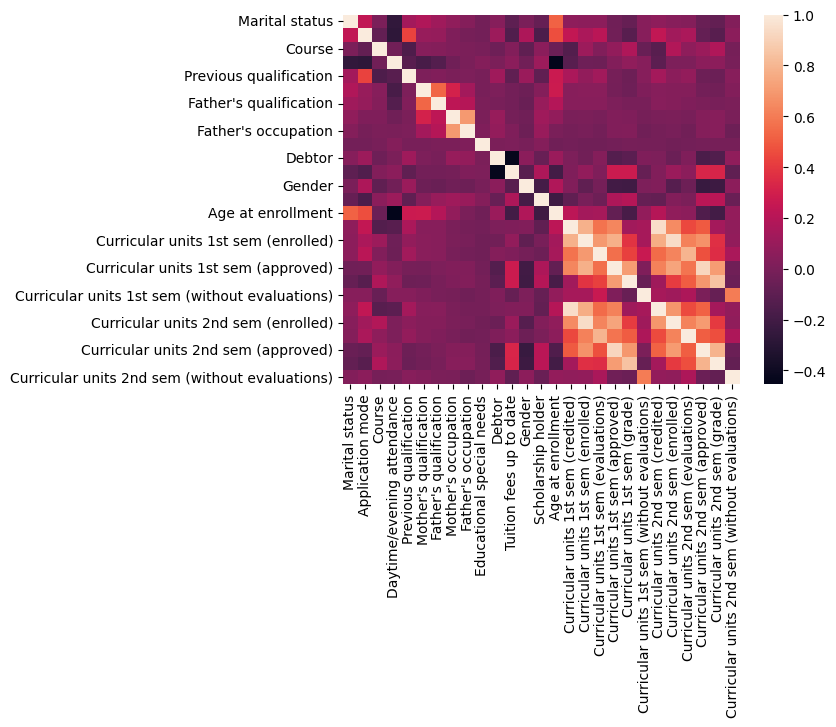

In [8]:
sns.heatmap(features.corr())

In [9]:
correlation = features.corrwith(target).abs().sort_values(ascending=False)
top5Correlation = correlation[:5]
print(top5Correlation)

Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Curricular units 1st sem (approved)    0.554881
Curricular units 1st sem (grade)       0.519927
Tuition fees up to date                0.442138
dtype: float64


In [10]:
#importing ml stuff
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target
0,1,8,2,1,1,13,10,6,10,0,...,0,0.000000,0,0,0,0,0,0.000000,0,1
1,1,6,11,1,1,1,3,4,4,0,...,6,14.000000,0,0,6,6,6,13.666667,0,0
2,1,1,5,1,1,22,27,10,10,0,...,0,0.000000,0,0,6,0,0,0.000000,0,1
3,1,8,15,1,1,23,27,6,4,0,...,6,13.428571,0,0,6,10,5,12.400000,0,0
4,2,12,3,0,1,22,28,10,10,0,...,5,12.333333,0,0,6,6,6,13.000000,0,0


In [12]:
#training the model
y=df["Target"]
y=y.astype('int')
x_df = df[['Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Tuition fees up to date']]
X=x_df.iloc[:,:-1]



X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

model = LogisticRegression()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    model.fit(X=X_train, y=y_train)
    
y_pred = model.predict(X_test)


cel = log_loss(y_test, y_pred)

print("Cross entropy loss:",cel)

y_pred = model.predict(X_test)

# Add predicted values as new column to X_test dataframe
X_test['Predicted'] = y_pred

# Print X_test to verify that predicted values were added
X_test.head()

Cross entropy loss: 4.614709230647109


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Predicted
200,4,14.333333,4,13.750000,0
1869,3,12.666667,6,11.666667,1
958,5,12.666667,5,13.200000,0
2043,6,12.166667,6,12.500000,0
4205,6,13.533333,6,13.533333,0


In [13]:
df_new = pd.merge(df, X_test['Predicted'], how = 'left',left_index = True, right_index = True)
df_new

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Predicted
0,1,8,2,1,1,13,10,6,10,0,...,0.000000,0,0,0,0,0,0.000000,0,1,NaN
1,1,6,11,1,1,1,3,4,4,0,...,14.000000,0,0,6,6,6,13.666667,0,0,NaN
2,1,1,5,1,1,22,27,10,10,0,...,0.000000,0,0,6,0,0,0.000000,0,1,NaN
3,1,8,15,1,1,23,27,6,4,0,...,13.428571,0,0,6,10,5,12.400000,0,0,0.0
4,2,12,3,0,1,22,28,10,10,0,...,12.333333,0,0,6,6,6,13.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,15,1,1,1,1,6,5,0,...,13.600000,0,0,6,8,5,12.666667,0,0,NaN
4420,1,1,15,1,1,1,1,10,10,0,...,12.000000,0,0,6,6,2,11.000000,0,1,NaN
4421,1,1,12,1,1,22,27,10,10,0,...,14.912500,0,0,8,9,1,13.500000,0,1,NaN
4422,1,1,9,1,1,22,27,8,5,0,...,13.800000,0,0,5,6,5,12.000000,0,0,NaN


In [14]:
df_prepro = df_new[df_new['Predicted'].notna()]

In [15]:
df_prepro

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Educational special needs,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Target,Predicted
3,1,8,15,1,1,23,27,6,4,0,...,13.428571,0,0,6,10,5,12.400000,0,0,0.0
4,2,12,3,0,1,22,28,10,10,0,...,12.333333,0,0,6,6,6,13.000000,0,0,0.0
6,1,1,12,1,1,13,28,8,11,0,...,13.300000,0,0,8,8,8,14.345000,0,0,0.0
7,1,9,11,1,1,22,27,10,10,0,...,0.000000,0,0,5,5,0,0.000000,0,1,1.0
10,1,1,14,1,1,23,14,6,8,0,...,12.333333,0,0,6,7,5,14.200000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2,12,8,1,12,2,1,9,9,0,...,11.000000,0,0,6,9,2,10.500000,0,1,1.0
4407,1,1,15,1,1,1,14,5,5,0,...,12.833333,0,0,6,7,6,13.285714,0,0,0.0
4410,1,1,5,1,1,22,14,10,5,0,...,13.500000,0,1,6,9,5,12.500000,0,0,0.0
4411,1,15,8,1,14,22,27,10,4,0,...,12.500000,0,0,6,11,3,13.333333,0,1,1.0


In [16]:
df_prepro.columns = df_prepro.columns.str.replace('Target', 'label_value')
df_prepro.columns = df_prepro.columns.str.replace('Predicted', 'score')
df_prepro.columns = df_prepro.columns.str.replace("Mother's qualification", 'Mother qualification')
df_prepro.columns = df_prepro.columns.str.replace("Father's qualification", 'Father qualification')
df_prepro.columns = df_prepro.columns.str.replace("Mother's occupation", 'Mother occupation')
df_prepro.columns = df_prepro.columns.str.replace("Father's occupation", 'Father occupation')
df_prepro

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Mother qualification,Father qualification,Mother occupation,Father occupation,Educational special needs,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),label_value,score
3,1,8,15,1,1,23,27,6,4,0,...,13.428571,0,0,6,10,5,12.400000,0,0,0.0
4,2,12,3,0,1,22,28,10,10,0,...,12.333333,0,0,6,6,6,13.000000,0,0,0.0
6,1,1,12,1,1,13,28,8,11,0,...,13.300000,0,0,8,8,8,14.345000,0,0,0.0
7,1,9,11,1,1,22,27,10,10,0,...,0.000000,0,0,5,5,0,0.000000,0,1,1.0
10,1,1,14,1,1,23,14,6,8,0,...,12.333333,0,0,6,7,5,14.200000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2,12,8,1,12,2,1,9,9,0,...,11.000000,0,0,6,9,2,10.500000,0,1,1.0
4407,1,1,15,1,1,1,14,5,5,0,...,12.833333,0,0,6,7,6,13.285714,0,0,0.0
4410,1,1,5,1,1,22,14,10,5,0,...,13.500000,0,1,6,9,5,12.500000,0,0,0.0
4411,1,15,8,1,14,22,27,10,4,0,...,12.500000,0,0,6,11,3,13.333333,0,1,1.0


In [18]:
# df_prepro['categorical_column_name'] = df_prepro['categorical_column_name'].astype(str)
df_ae, _ = preprocess_input_df(df_prepro)